In [5]:
import pandas as pd
import numpy as np
import os

In [6]:
raw_data_path = os.path.join(os.pardir, 'data', 'raw')
train_file_path = os.path.join(raw_data_path, "train.csv")
test_file_path = os.path.join(raw_data_path, "test.csv")

In [7]:
train_df = pd.read_csv(train_file_path, index_col='PassengerId')
test_df = pd.read_csv(test_file_path, index_col='PassengerId')
type(train_df)

pandas.core.frame.DataFrame

In [8]:
df = pd.concat((train_df, test_df))

/Users/howard.pinsley/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=True'.

To retain the current behavior and silence the warning, pass sort=False

  """Entry point for launching an IPython kernel.


In [9]:
df.head(3)

,Age,Cabin,Embarked,Fare,Name,Parch,Pclass,Sex,SibSp,Survived,Ticket
PassengerId,,,,,,,,,,,
1,22.0,NaN,S,7.2500,"Braund, Mr. Owen Harris",0,3,male,1,0.0,A/5 21171
2,38.0,C85,C,71.2833,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,1,female,1,1.0,PC 17599
3,26.0,NaN,S,7.9250,"Heikkinen, Miss. Laina",0,3,female,0,1.0,STON/O2. 3101282


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1309 entries, 1 to 1309
Data columns (total 11 columns):
Age         1046 non-null float64
Cabin       295 non-null object
Embarked    1307 non-null object
Fare        1308 non-null float64
Name        1309 non-null object
Parch       1309 non-null int64
Pclass      1309 non-null int64
Sex         1309 non-null object
SibSp       1309 non-null int64
Survived    891 non-null float64
Ticket      1309 non-null object
dtypes: float64(3), int64(3), object(5)
memory usage: 122.7+ KB


## Deal with missing values in the Embarded Column

In [11]:
df[df.Embarked.isnull()]

,Age,Cabin,Embarked,Fare,Name,Parch,Pclass,Sex,SibSp,Survived,Ticket
PassengerId,,,,,,,,,,,
62,38.0,B28,NaN,80.0,"Icard, Miss. Amelie",0,1,female,0,1.0,113572
830,62.0,B28,NaN,80.0,"Stone, Mrs. George Nelson (Martha Evelyn)",0,1,female,0,1.0,113572


In [12]:
df.Embarked.value_counts()

S    914
C    270
Q    123
Name: Embarked, dtype: int64

Note that in the case of these two passengers, they are first class and paid 80.0.  Instead of mode, let's look at how the class and embarkation point might affect fare

In [13]:
df.groupby(['Pclass', 'Embarked']).Fare.median().unstack()

Embarked,C,Q,S
Pclass,,,
1,76.7292,90.00,52.000
2,15.3146,12.35,15.375
3,7.8958,7.75,8.050


In [14]:
df.Embarked.fillna('C', inplace=True)

## Fix one passenger with missing fare

In [15]:
df[df.Embarked.isnull()]


,Age,Cabin,Embarked,Fare,Name,Parch,Pclass,Sex,SibSp,Survived,Ticket
PassengerId,,,,,,,,,,,


In [16]:
df[df.Fare.isnull()]

,Age,Cabin,Embarked,Fare,Name,Parch,Pclass,Sex,SibSp,Survived,Ticket
PassengerId,,,,,,,,,,,
1044,60.5,NaN,S,NaN,"Storey, Mr. Thomas",0,3,male,0,NaN,3701


In [17]:
median_fare = df.loc[(df.Pclass == 3) & (df.Embarked == 'S')].Fare.median()
print(median_fare)

8.05


In [18]:
df.Fare.fillna(median_fare, inplace=True)

In [19]:
df[df.Fare.isnull()]

,Age,Cabin,Embarked,Fare,Name,Parch,Pclass,Sex,SibSp,Survived,Ticket
PassengerId,,,,,,,,,,,


In [36]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1309 entries, 1 to 1309
Data columns (total 11 columns):
Age         1046 non-null float64
Cabin       295 non-null object
Embarked    1309 non-null object
Fare        1309 non-null float64
Name        1309 non-null object
Parch       1309 non-null int64
Pclass      1309 non-null int64
Sex         1309 non-null object
SibSp       1309 non-null int64
Survived    891 non-null float64
Ticket      1309 non-null object
dtypes: float64(3), int64(3), object(5)
memory usage: 162.7+ KB


## Feature: Age

In [20]:
df[df.Age.isnull()]

,Age,Cabin,Embarked,Fare,Name,Parch,Pclass,Sex,SibSp,Survived,Ticket
PassengerId,,,,,,,,,,,
6,NaN,NaN,Q,8.4583,"Moran, Mr. James",0,3,male,0,0.0,330877
18,NaN,NaN,S,13.0000,"Williams, Mr. Charles Eugene",0,2,male,0,1.0,244373
20,NaN,NaN,C,7.2250,"Masselmani, Mrs. Fatima",0,3,female,0,1.0,2649
27,NaN,NaN,C,7.2250,"Emir, Mr. Farred Chehab",0,3,male,0,0.0,2631
29,NaN,NaN,Q,7.8792,"O'Dwyer, Miss. Ellen ""Nellie""",0,3,female,0,1.0,330959
30,NaN,NaN,S,7.8958,"Todoroff, Mr. Lalio",0,3,male,0,0.0,349216
32,NaN,B78,C,146.5208,"Spencer, Mrs. William Augustus (Marie Eugenie)",0,1,female,1,1.0,PC 17569
33,NaN,NaN,Q,7.7500,"Glynn, Miss. Mary Agatha",0,3,female,0,1.0,335677
37,NaN,NaN,C,7.2292,"Mamee, Mr. Hanna",0,3,male,0,1.0,2677


## Which feature or features can we use to fill in missing age

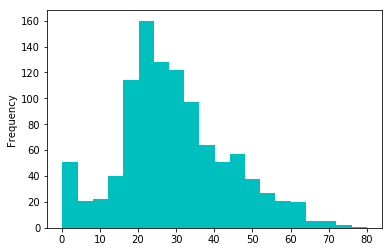

In [22]:
df.Age.plot(kind='hist', bins=20, color='c')

In [23]:
df.groupby('Sex').Age.median()

Sex
female    27.0
male      28.0
Name: Age, dtype: float64

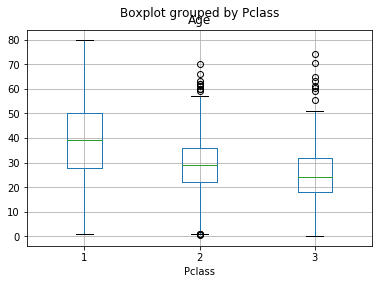

In [24]:
#age_sex_median = df.groupby('Sex').Age.transform('median')
df[df.Age.notnull()].boxplot('Age', 'Pclass')

In [25]:
df.Name.head()

PassengerId
1                              Braund, Mr. Owen Harris
2    Cumings, Mrs. John Bradley (Florence Briggs Th...
3                               Heikkinen, Miss. Laina
4         Futrelle, Mrs. Jacques Heath (Lily May Peel)
5                             Allen, Mr. William Henry
Name: Name, dtype: object

### Try to create a new feature based on the person's "title" embedded in their name

In [26]:
def extractTitle(name):
    
    title_group = {
        'mr' :'Mr',
        'mrs' :'Mrs',
        'miss' :'Miss',
        'master' :'Master', 
        'don' :'Sir', 
        'rev' :'Sir', 
        'dr' :'Officer',
        'mme' :'Mrs',
        'ms':'Mrs',
        'major' :'Officer',
        'lady' :'Lady',
        'sir' :'Sir', 
        'mlle' :'Miss',
        'col' :'Officer', 
        'capt' :'Officer',
        'the countess':'Lady',
        'jonkheer' :'Sir',
        'dona':'Lady'
    }
    
    first_name_with_title = name.split(',')[1]
    title = first_name_with_title.split('.')[0]
    return title_group[title.strip().lower()]


### Create a new feature called Title

In [27]:
df.Name.map(lambda n: extractTitle(n)).unique()

array(['Mr', 'Mrs', 'Miss', 'Master', 'Sir', 'Officer', 'Lady'],
      dtype=object)

In [28]:
df['Title'] = df.Name.map(lambda t: extractTitle(t))

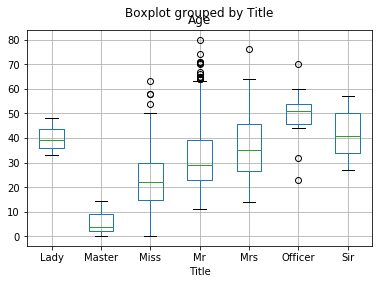

In [29]:
# This looks better
df[df.Age.notnull()].boxplot('Age', 'Title')

In [30]:
title_median_age = df.groupby('Title').Age.transform('median')
df.Age.fillna(title_median_age, inplace=True)

In [31]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1309 entries, 1 to 1309
Data columns (total 12 columns):
Age         1309 non-null float64
Cabin       295 non-null object
Embarked    1309 non-null object
Fare        1309 non-null float64
Name        1309 non-null object
Parch       1309 non-null int64
Pclass      1309 non-null int64
Sex         1309 non-null object
SibSp       1309 non-null int64
Survived    891 non-null float64
Ticket      1309 non-null object
Title       1309 non-null object
dtypes: float64(3), int64(3), object(6)
memory usage: 132.9+ KB


# Now deal with outliers

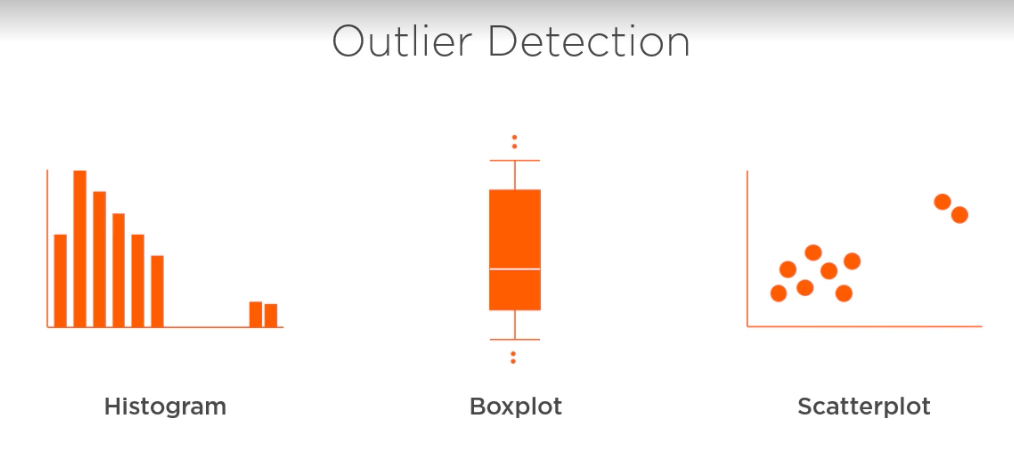

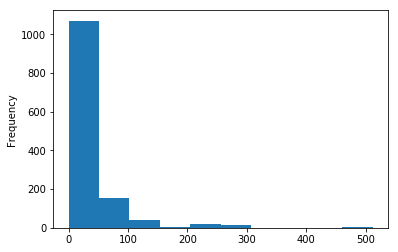

In [32]:
# Look for outliers in passenger fare
df.Fare.plot(kind='hist')

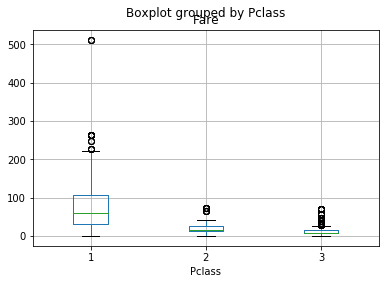

In [40]:
df.boxplot('Fare', 'Pclass')

In [46]:
df.loc[df.Fare > 500]

,Age,Cabin,Embarked,Fare,Name,Parch,Pclass,Sex,SibSp,Survived,Ticket,Title
PassengerId,,,,,,,,,,,,
259,35.0,NaN,C,512.3292,"Ward, Miss. Anna",0,1,female,0,1.0,PC 17755,Miss
680,36.0,B51 B53 B55,C,512.3292,"Cardeza, Mr. Thomas Drake Martinez",1,1,male,0,1.0,PC 17755,Mr
738,35.0,B101,C,512.3292,"Lesurer, Mr. Gustave J",0,1,male,0,1.0,PC 17755,Mr
1235,58.0,B51 B53 B55,C,512.3292,"Cardeza, Mrs. James Warburton Martinez (Charlo...",1,1,female,0,NaN,PC 17755,Mrs


In [44]:
# Note above the common ticket number...
df.loc[df.Fare > 500, ['Age']]

,Age
PassengerId,
259,35.0
680,36.0
738,35.0
1235,58.0


In [48]:
# You could create a new feature called LogFare
LogFare = np.log(df.Fare+1)

In [58]:
# You could use quantile cut to create do 'binning'
pd.qcut(df.Fare, 4)

PassengerId
1         (-0.001, 7.896]
2       (31.275, 512.329]
3         (7.896, 14.454]
4       (31.275, 512.329]
5         (7.896, 14.454]
6         (7.896, 14.454]
7       (31.275, 512.329]
8        (14.454, 31.275]
9         (7.896, 14.454]
10       (14.454, 31.275]
11       (14.454, 31.275]
12       (14.454, 31.275]
13        (7.896, 14.454]
14       (14.454, 31.275]
15        (-0.001, 7.896]
16       (14.454, 31.275]
17       (14.454, 31.275]
18        (7.896, 14.454]
19       (14.454, 31.275]
20        (-0.001, 7.896]
21       (14.454, 31.275]
22        (7.896, 14.454]
23        (7.896, 14.454]
24      (31.275, 512.329]
25       (14.454, 31.275]
26      (31.275, 512.329]
27        (-0.001, 7.896]
28      (31.275, 512.329]
29        (-0.001, 7.896]
30        (-0.001, 7.896]
              ...        
1280      (-0.001, 7.896]
1281     (14.454, 31.275]
1282    (31.275, 512.329]
1283    (31.275, 512.329]
1284     (14.454, 31.275]
1285      (7.896, 14.454]
1286     (14.454, 31.275]


In [60]:
# You can assign labels to bins to transform a numerical feature to a category feature (this is one technique in the general family
# of discretization techniques)
pd.qcut(df.Fare, 4, labels=['very_low', 'low', 'high', 'very_high'])

PassengerId
1        very_low
2       very_high
3             low
4       very_high
5             low
6             low
7       very_high
8            high
9             low
10           high
11           high
12           high
13            low
14           high
15       very_low
16           high
17           high
18            low
19           high
20       very_low
21           high
22            low
23            low
24      very_high
25           high
26      very_high
27       very_low
28      very_high
29       very_low
30       very_low
          ...    
1280     very_low
1281         high
1282    very_high
1283    very_high
1284         high
1285          low
1286         high
1287    very_high
1288     very_low
1289    very_high
1290     very_low
1291     very_low
1292    very_high
1293         high
1294    very_high
1295    very_high
1296         high
1297          low
1298          low
1299    very_high
1300     very_low
1301          low
1302     very_low
1303    very_hig

In [61]:
pd.qcut(df.Fare, 4, labels=['very_low', 'low', 'high', 'very_high']).value_counts()

very_low     337
high         328
very_high    323
low          321
Name: Fare, dtype: int64

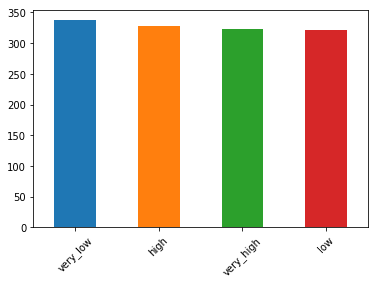

In [64]:
pd.qcut(df.Fare, 4, labels=['very_low', 'low', 'high', 'very_high']).value_counts().plot(kind='bar', rot=45);

In [65]:
# Create new feature using binning technique above for passenger fare (this is part of feature engineering)
df['Fare_Bin'] = pd.qcut(df.Fare, 4, labels=['very_low', 'low', 'high', 'very_high'])

In [66]:
df

,Age,Cabin,Embarked,Fare,Name,Parch,Pclass,Sex,SibSp,Survived,Ticket,Title,Fare_Bin
PassengerId,,,,,,,,,,,,,
1,22.0,NaN,S,7.2500,"Braund, Mr. Owen Harris",0,3,male,1,0.0,A/5 21171,Mr,very_low
2,38.0,C85,C,71.2833,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,1,female,1,1.0,PC 17599,Mrs,very_high
3,26.0,NaN,S,7.9250,"Heikkinen, Miss. Laina",0,3,female,0,1.0,STON/O2. 3101282,Miss,low
4,35.0,C123,S,53.1000,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,1,female,1,1.0,113803,Mrs,very_high
5,35.0,NaN,S,8.0500,"Allen, Mr. William Henry",0,3,male,0,0.0,373450,Mr,low
6,29.0,NaN,Q,8.4583,"Moran, Mr. James",0,3,male,0,0.0,330877,Mr,low
7,54.0,E46,S,51.8625,"McCarthy, Mr. Timothy J",0,1,male,0,0.0,17463,Mr,very_high
8,2.0,NaN,S,21.0750,"Palsson, Master. Gosta Leonard",1,3,male,3,0.0,349909,Master,high
9,27.0,NaN,S,11.1333,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",2,3,female,0,1.0,347742,Mrs,low


# Feature Engineering

## Age State: (Adult or Child)

In [68]:
np.where(df.Age >= 18, 'Adult', 'Child')

array(['Adult', 'Adult', 'Adult', ..., 'Adult', 'Adult', 'Child'],
      dtype='<U5')